In [1]:
import sys
sys.path.append("")
import cv2 
import numpy as np
from matplotlib import pyplot as plt

(512, 512)


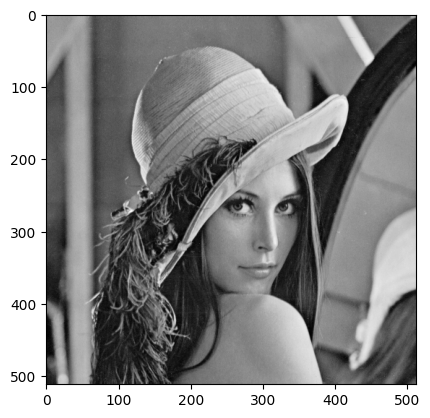

In [2]:
img = cv2.cvtColor(cv2.imread('./cube.png'),cv2.COLOR_BGR2GRAY)
print(img.shape)
plt.imshow(img,"gray")

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.05719096, 0.254644  , 0.33333334, 0.254644  ,
        0.05719096, 0.        ],
       [0.        , 0.254644  , 0.5285955 , 0.6666667 , 0.5285955 ,
        0.254644  , 0.        ],
       [0.        , 0.33333334, 0.6666667 , 1.        , 0.6666667 ,
        0.33333334, 0.        ],
       [0.        , 0.254644  , 0.5285955 , 0.6666667 , 0.5285955 ,
        0.254644  , 0.        ],
       [0.        , 0.05719096, 0.254644  , 0.33333334, 0.254644  ,
        0.05719096, 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ]], dtype=float32)

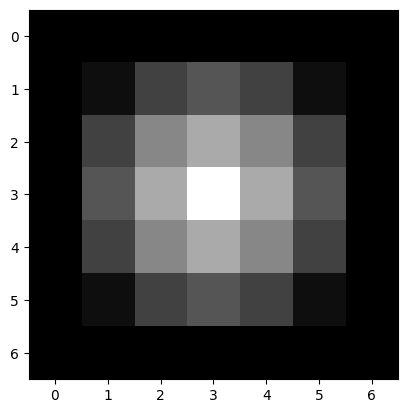

In [17]:
def Filter(size):
    kernel=np.zeros((size,size),dtype=np.float32)
    d=size//2
    
    
    norm_sum=0
    for i in range(size):
        for j in range(size):
            
            x=i-d
            xx=x*x
            y=j-d
            yy=y*y
            r=np.sqrt(xx+yy)
            rd=r/d
            
            if rd>=-1 and rd <=1:
                
                kernel[i,j]=abs(1-rd)
            else:
                kernel[i,j]=0

    plt.imshow(kernel,"gray")
    #kernel=kernel/norm_sum
    
    return kernel

    

Filter(7)

In [15]:
def get_kernel(img, x, y, size, sigma):
    kernel = np.zeros((size, size), dtype=np.float32)
    mid = size // 2
    s=t=mid
    
    for shift_x in range(-mid, mid+1):
        for shift_y in range(-mid, mid+1):
            #kernel[i+mid, j+mid] = (1 / (2 * np.pi * sigma**2)) *  np.exp(- (img[x, y] - img[x+shift_x, y+shift_y])**2 / (2 * sigma**2))
            kernel[s+shift_x, t+shift_y] = np.exp(- (img[x, y] - img[x+shift_x, y+shift_y])**2 / (2 * sigma**2))
     
    return kernel

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

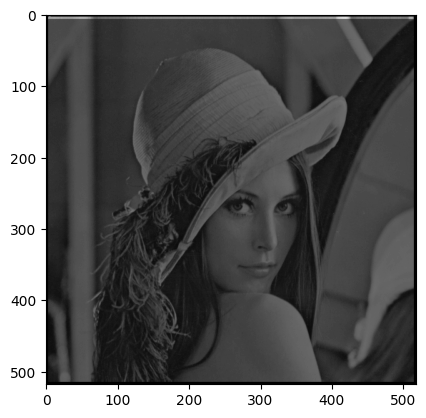

In [16]:
def convolution(img):
    size=7
    kernel=Filter(size)
    pad=size//2
    
    fp=np.pad(img, ((pad, pad), (pad,pad)),mode='constant', constant_values=0).astype(np.float32) #np.float64
    
    fo=np.zeros_like(fp)
    h=fp.shape[0]
    w=fp.shape[1]
    for x in range(pad,h-pad):
        for y in range(pad,w-pad):
            kernel = kernel * get_kernel(fp, x, y, size,80)
            
            sum=0
            s=t=pad
            
            for shift_x in range(-pad,pad+1):
                for shift_y in range(-pad,pad+1):
                    sum+=(kernel[s-shift_x][t-shift_y]*fp[x+shift_x][y+shift_y])
            
            fo[x][y]=sum
    norm=np.sum(fo)
    fo=fo/norm
    
    fo=cv2.normalize(fo, fo, 0, 255, cv2.NORM_MINMAX)
    fo = fo.astype(np.uint8)
    
    plt.imshow(fo,"gray")
    
    return fo
convolution(img)